In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [2]:
dados = pd.read_json('dados_notas_col.json')
print(dados.id.nunique())
print(dados.shape)
dados.head(3)

6395
(6395, 34)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,data,descricao,descricao_area_residencial,descricao_companhia_domiciliar,descricao_encaminhamento,descricao_historico,descricao_historico_disciplina,descricao_imovel,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_situacao_matricula_periodo,descricao_trabalho_responsavel,id,media_final,nome_escola_ensino_fundamental,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,professores,qnt_pc,qtd_pessoas_domicilio,renda_bruta_familiar,sigla
0,86,-1,87,-1,2016,2016,59067-400,1,05/05/2017,Matriculado,Urbana,Pais,Diálogo com professor(a),Técnico de Nível Médio em Edificações,Língua Portuguesa e Literatura I(90H),Financiado,Pós graduação incompleto,Pós graduação completo,Parda,Pós graduação completo,Pai,Aprovado,Serviço público,496915657473,86,Complexo Educacional Contemporâneo,85.0,06/12/2001,M,[1521],NaN,4,9000.0,CNAT
100002,69,-1,5,-1,2015,2016,59795-000,1,None,Matriculado,Urbana,Mãe,None,"Técnico de Nivel Médio em Agropecuária, na For...",Língua Portuguesa e Literatura I(90H),Alugado,Ensino fundamental incompleto,Ensino médio completo,Branca,Ensino médio completo,Pai,Dependência,Autônomo,458905053917,69,Escola Estadual António Francisco,92.0,16/12/1999,M,"[2688, 3538, 1222]",0.0,3,500.0,AP
100021,83,-1,77,-1,2016,2016,59200-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nivel Médio Informática,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio incompleto,Branca,Ensino médio completo,Pai,Aprovado,Autônomo,496533683389,83,IESC,99.0,01/06/2000,F,"[1592, 3388]",0.0,7,2500.0,SC


In [3]:
del dados['descricao_historico_disciplina']
del dados['professores']
del dados['id']
del dados['media_final']
del dados['percentual_frequencia']
del dados['nome_escola_ensino_fundamental']
del dados['qnt_pc']

#colocar novamente
del dados['cep']
del dados['data']
del dados['pessoa_fisica__nascimento_data']

#descricao_encaminhamento colocar booleano

#dados
dados2 = dados.copy() 
 
#dados que fazem a indicação se o aluno foi evadido ou não
del dados['descricao']
del dados['descricao_situacao_matricula_periodo']

In [4]:
y = dados.classe
X = dados

del X['classe']
X.shape


(6395, 21)

In [5]:
dados_dummies2 = pd.get_dummies(dados2, drop_first=False) 

dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

(6395, 161)

In [6]:
dados_clean2 = dados_dummies2.replace([np.inf, -np.inf], np.nan)
dados_clean2 = dados_clean2.dropna(axis=1, how='all')

dados_dummies.head(2)

dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')

dados_clean.shape

(6395, 161)

In [7]:
np.isfinite( dados_clean ).all()

LnguaPortuguesaeLiteraturaI90H                                                    True
LnguaPortuguesaeLiteraturaII90H                                                   True
MatemticaI120H                                                                    True
MatemticaII90H                                                                    True
ano_letivo__ano                                                                   True
ano_letivo__ano_matricula_periodo                                                 True
qtd_pessoas_domicilio                                                             True
renda_bruta_familiar                                                              True
descricao_area_residencial_Comunidade Indígena                                    True
descricao_area_residencial_Comunidade Quilombola                                  True
descricao_area_residencial_Não informado                                          True
descricao_area_residencial_Rural           

In [8]:
%matplotlib inline

#EDA
#dados_clean.info()
#dados_clean.describe()
#dados_clean.plot.hist()
#dados_clean.corr()['LnguaPortuguesaeLiteraturaI90H'].sort_values(ascending=False)

#NORMALIZAR OS DADOS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2de3c115f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2de3f9de80>]], dtype=object)

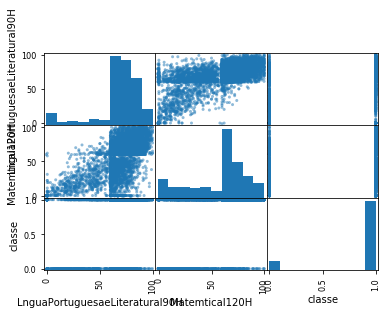

In [9]:
#CORRELAÇÃO DE DADOS

%matplotlib inline

dados_clean2.corr()['classe'].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
scatter_matrix(dados_clean2[['LnguaPortuguesaeLiteraturaI90H', 'MatemticaI120H', 'classe']])

In [7]:
#ESCALONAMENTO DE DADOS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

#dados_clean3 = StandardScaler().fit_transform(dados_clean)
#dados_clean3 = MinMaxScaler().fit_transform(dados_clean)
#dados_clean3 = RobustScaler(quantile_range=(25, 75)).fit_transform(dados_clean)
dados_clean3 = dados_clean

In [ ]:
#APRENDIZADO SUPERVISIONADO

In [18]:
model = RandomForestClassifier()
clf = model.fit(dados_clean, y)

In [19]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


-0.114417237978
0.0199971205558


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


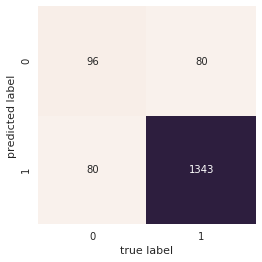

In [26]:
#Evaluating

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#scores
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, Xtest, ytest, scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-scores)
rmse_scores
print(scores.mean())
print(scores.std())



In [13]:
"""
from sklearn.tree import export_graphviz
from sklearn import tree

export_graphviz(clf,
                feature_names=X.columns,
                filled=True,
                rounded=True)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
"""

'\nfrom sklearn.tree import export_graphviz\nfrom sklearn import tree\n\nexport_graphviz(clf,\n                feature_names=X.columns,\n                filled=True,\n                rounded=True)\n\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("iris") \n'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


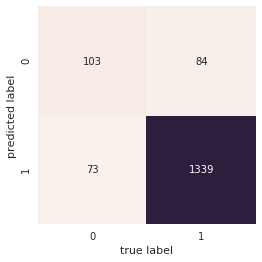

In [8]:
model = DecisionTreeClassifier()
clf = model.fit(dados_clean3, y)

from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean3, y, random_state=0)
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [45]:
export_graphviz(clf,
                feature_names=dados_clean.columns,
                filled=True,
                rounded=True, 
                out_file='tree.dot')

In [46]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

In [47]:
%matplotlib inline
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

In [48]:
dados_clean.head(5)

,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,qtd_pessoas_domicilio,renda_bruta_familiar,descricao_area_residencial_Comunidade Indígena,descricao_area_residencial_Comunidade Quilombola,descricao_area_residencial_Não informado,descricao_area_residencial_Rural,descricao_area_residencial_Urbana,descricao_companhia_domiciliar_Cônjuge,descricao_companhia_domiciliar_Mãe,descricao_companhia_domiciliar_Não informado,descricao_companhia_domiciliar_Outros,descricao_companhia_domiciliar_Pai,descricao_companhia_domiciliar_Pais,descricao_companhia_domiciliar_Parente(s) ou amigo(s),descricao_companhia_domiciliar_Sozinho(a),descricao_encaminhamento_Atendimento domiciliar,descricao_encaminhamento_Contato telefônico com os pais ou responsáveis,descricao_encaminhamento_Diálogo com aluno(a) e professor(a),descricao_encaminhamento_Diálogo com o(s) aluno(s),descricao_encaminhamento_Diálogo com pais ou responsáveis,descricao_encaminhamento_Diálogo com professor(a),descricao_encaminhamento_Elaboração de rotina de estudos,descricao_encaminhamento_Envio de Telegrama ou e-mail aos pais ou responsáveis,descricao_encaminhamento_Orientação para cancelamento de matrícula​,descricao_encaminhamento_Orientação para trancamento compulsório de matrícula,descricao_encaminhamento_Orientação para transferência de Curso/Campus,descricao_encaminhamento_Solicitação de Aplicação/Registro de medida disciplinar,descricao_encaminhamento_Solicitação de atendimento da Assistência Social,descricao_encaminhamento_Solicitação de atendimento da Psicologia,descricao_encaminhamento_Solicitação de atendimento do Setor de saúde,descricao_encaminhamento_Solicitação de comparecimento dos pais ou responsáveis à escola,descricao_historico_Técnico de Nivel Médio Informática,"descricao_historico_Técnico de Nivel Médio em Agropecuária, na Forma Integrada",descricao_historico_Técnico de Nivel Médio em Biocombustíveis,descricao_historico_Técnico de Nivel Médio em Equipamentos Biomédicos,descricao_historico_Técnico de Nivel Médio em Informática,descricao_historico_Técnico de Nível Médio em Administração,descricao_historico_Técnico de Nível Médio em Agroecologia,descricao_historico_Técnico de Nível Médio em Alimentos,descricao_historico_Técnico de Nível Médio em Apicultura,descricao_historico_Técnico de Nível Médio em Comércio,descricao_historico_Técnico de Nível Médio em Controle Ambiental,descricao_historico_Técnico de Nível Médio em Edificações,descricao_historico_Técnico de Nível Médio em Eletromecânica,descricao_historico_Técnico de Nível Médio em Eletrotécnica,descricao_historico_Técnico de Nível Médio em Eletrônica,descricao_historico_Técnico de Nível Médio em Eventos,descricao_historico_Técnico de Nível Médio em Geologia,descricao_historico_Técnico de Nível Médio em Informática,descricao_historico_Técnico de Nível Médio em Informática para Internet,descricao_historico_Técnico de Nível Médio em Lazer,descricao_historico_Técnico de Nível Médio em Logística,descricao_historico_Técnico de Nível Médio em Manutenção e Suporte em Informática,descricao_historico_Técnico de Nível Médio em Mecatrônica,descricao_historico_Técnico de Nível Médio em Mecânica,descricao_historico_Técnico de Nível Médio em Meio Ambiente,descricao_historico_Técnico de Nível Médio em Mineração,descricao_historico_Técnico de Nível Médio em Multimídia,descricao_historico_Técnico de Nível Médio em Química,"descricao_historico_Técnico de Nível Médio em Química, na Forma Integrado",descricao_historico_Técnico de Nível Médio em Recursos Pesqueiros,descricao_historico_Técnico de Nível Médio em Refrigeração e Climatização,descricao_historico_Técnico de Nível Médio em Têxtil,descricao_historico_Técnico de Nível Médio em Vestuário,descricao_historico_Técnico em Programação de Jogos Digitais,descricao_imovel_Alugado,descricao_imovel_Cedido ou Emprestado,descricao_imovel_Financiado,descricao_imovel_Não informado,descricao_imovel_Outr

In [49]:
dados_clean.columns[0]

'LnguaPortuguesaeLiteraturaI90H'

In [10]:
#GRID
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},    
                  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,                           
                           scoring='neg_mean_squared_error')

grid_search.fit(dados_clean, y)
grid_search.best_params_ 

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},    
                  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  ]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,                           
                           scoring='neg_mean_squared_error')

grid_search.fit(dados_clean, y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [13]:
grid_search.best_params_ 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params) 

0.35302778376 {'max_features': 2, 'n_estimators': 3}
0.331792110652 {'max_features': 2, 'n_estimators': 10}
0.332733366758 {'max_features': 2, 'n_estimators': 30}
0.346996495128 {'max_features': 4, 'n_estimators': 3}
0.317338423053 {'max_features': 4, 'n_estimators': 10}
0.320037136235 {'max_features': 4, 'n_estimators': 30}
0.333202997714 {'max_features': 6, 'n_estimators': 3}
0.304513865518 {'max_features': 6, 'n_estimators': 10}
0.307579518631 {'max_features': 6, 'n_estimators': 30}
0.328714414859 {'max_features': 8, 'n_estimators': 3}
0.303999917699 {'max_features': 8, 'n_estimators': 10}
0.299334680546 {'max_features': 8, 'n_estimators': 30}
0.358739867336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.327522985007 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.355675529233 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.324163686102 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.343144635414 {'bootstrap': False, 'max_featur

In [16]:
#FEATURES IMPORTANCE
feature_importances = grid_search.best_estimator_.feature_importances_ 
feature_importances

array([  1.87618461e-01,   5.71082431e-02,   8.10819001e-02,
         4.14551757e-02,   2.27482661e-02,   2.83430447e-02,
         3.09112681e-02,   4.68045766e-02,   0.00000000e+00,
         2.29306048e-05,   1.68583991e-02,   5.87873596e-03,
         1.13468986e-02,   2.34697294e-03,   7.09181372e-03,
         3.20381089e-04,   2.75766870e-03,   2.87585361e-03,
         7.52061915e-03,   5.27613635e-03,   4.22132975e-05,
         3.74287399e-04,   3.64705201e-03,   1.23141922e-03,
         7.41678287e-03,   1.21485571e-03,   7.29098999e-04,
         4.42578611e-04,   2.55266475e-04,   2.58479998e-03,
         7.27275368e-05,   1.36128916e-03,   1.42029713e-04,
         8.59670720e-05,   3.66359745e-04,   8.89874797e-05,
         4.70971267e-04,   4.36797199e-03,   1.62716049e-03,
         6.09225288e-04,   7.54126367e-04,   8.44778109e-03,
         4.39781994e-03,   8.89369435e-04,   1.75185068e-03,
         9.28088333e-04,   1.40287502e-03,   2.02658309e-03,
         4.92343564e-03,